K-Means Clusterting

In [1]:
%pip install yellowbrick


     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/282.6 kB 325.1 kB/s eta 0:00:01
     ----- ------------------------------- 41.0/282.6 kB 326.8 kB/s eta 0:00:01
     -------------- --------------------- 112.6/282.6 kB 726.2 kB/s eta 0:00:01
     ------------------------------ ------- 225.3/282.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 1.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Install Plotly and nbformat

In [2]:
%pip install plotly nbformat

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.6 MB 14.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/15.6 MB 15.0 MB/s eta 0:00:01
   --- ------------------------------------ 1.4/15.6 MB 15.3 MB/s eta 0:00:01
   ----- ---------------------------------- 2.1/15.6 MB 14.8 MB/s eta 0:00:01
   ----- ---------------------------------- 2.3/15.6 MB 14.7 MB/s eta 0:00:01
   ------ --------------------------------- 2.5/15.6 MB 12.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.8/15.6 MB 11.2 MB/s eta 0:00:02
   ------- -------------------------------- 3.0/15.6 MB 10.5 MB/s eta 0:00:02
   -------- ------------------------------- 3.1/15.6 MB 9.5 MB/s eta 0:00:02
   -------- ------------------------------- 3.3/15.6 MB 9.1 MB/s eta 0:00:02
   -------- ------------------------------- 3.4/15.6 MB 8.4 MB/s eta 0:00:02
   --------- ------------------------------ 3.6/15.6 MB 8.2 MB/s eta 0:00:0


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

Read the mall customers dataset

In [5]:
import pandas as pd
df = pd.read_csv("Mall Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Income', 'Spend']
df.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Classify Similar customers on basis of Income and Spend

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

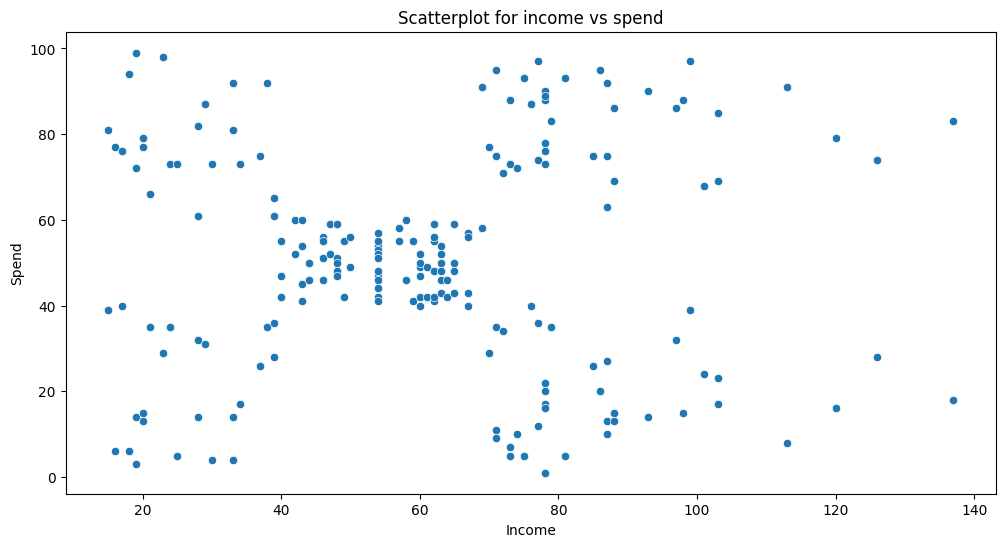

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Income', y='Spend')
plt.title('Scatterplot for income vs spend')
plt.show()

Seperate X value from your data

In [13]:
X = df[['Income', 'Spend']]
X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Preprocess the X data

In [14]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


For Kmean method find Optimal value of K with Elbow method

In [17]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

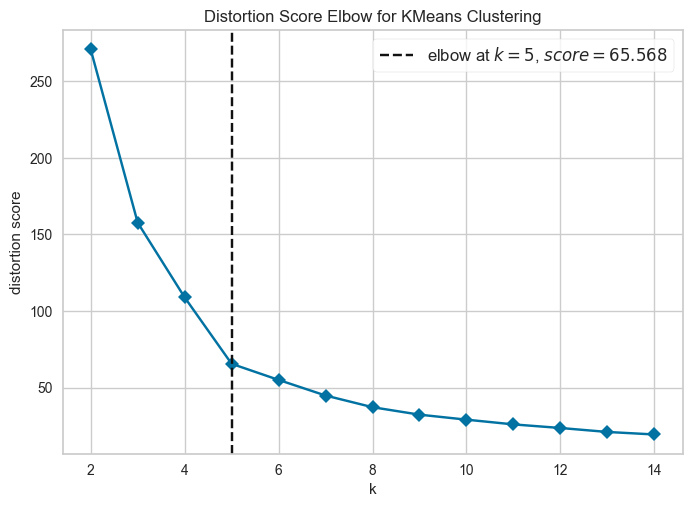

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [18]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2, 15),
                  timings=False)


Create a KMeans model with number of clusters as 5

In [19]:
model = KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [20]:
model.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [21]:

X.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [23]:
X['Label']=model.labels_
X

,Income,Spend,Label
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


Visualize above clusters

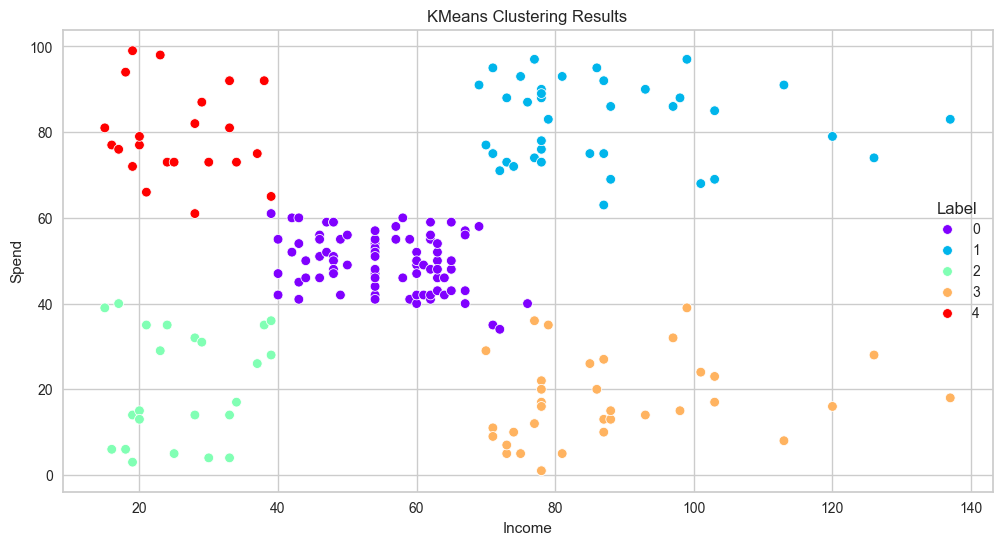

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=X, x='Income', y='Spend', hue='Label', palette='rainbow')
plt.title('KMeans Clustering Results')
plt.show()

Cluster Similar customers on basis of age, income and Spending

In [25]:
X2 = df[['Age', 'Income', 'Spend']]
X2

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [26]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())]).set_output(transform='pandas')

In [27]:
X2_pre = num_pipe2.fit_transform(X2)
X2_pre.head()

,Age,Income,Spend
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


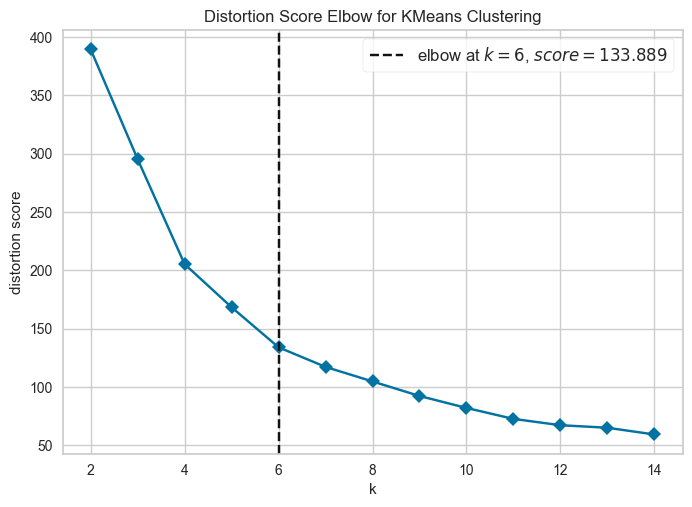

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [28]:
kelbow_visualizer(KMeans(),
                  X2_pre,
                  k=(2, 15),
                  timings=False)

In [29]:
model2 = KMeans(n_clusters=6)
model2.fit(X2_pre)

KMeans(n_clusters=6)

In [30]:
model2.labels_

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2,
       4, 2, 0, 5, 5, 5, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5,
       0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 5, 0, 0, 5,
       5, 0, 0, 5, 0, 5, 5, 5, 0, 5, 0, 5, 5, 0, 0, 5, 0, 5, 0, 0, 0, 0,
       0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 5, 5, 5, 1, 5, 1, 3, 1, 3, 1, 3, 1,
       5, 1, 3, 1, 3, 1, 5, 1, 3, 1, 5, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [31]:
X2['Label'] = model2.labels_

In [32]:
X2.head()

,Age,Income,Spend,Label
0,19,15,39,2
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


In [33]:
X2['Label'].unique()

array([2, 4, 0, 5, 1, 3])

In [34]:
for i in range(6):
    print(f'Cluster Number : {i}\n')
    display(X2[X2['Label']==i])
    print('\n=====================================================\n')

Cluster Number : 0



,Age,Income,Spend,Label
40,65,38,35,0
46,50,40,55,0
50,49,42,52,0
53,59,43,60,0
54,50,43,45,0
55,47,43,41,0
56,51,44,50,0
57,69,44,46,0
59,53,46,46,0
60,70,46,56,0




Cluster Number : 1



,Age,Income,Spend,Label
123,39,69,91,1
125,31,70,77,1
127,40,71,95,1
129,38,71,75,1
131,39,71,75,1
133,31,72,71,1
135,29,73,88,1
137,32,73,73,1
139,35,74,72,1
141,32,75,93,1




Cluster Number : 2



,Age,Income,Spend,Label
0,19,15,39,2
1,21,15,81,2
3,23,16,77,2
5,22,17,76,2
7,23,18,94,2
9,30,19,72,2
11,35,19,99,2
13,24,20,77,2
15,22,20,79,2
17,20,21,66,2




Cluster Number : 3



,Age,Income,Spend,Label
126,43,71,35,3
128,59,71,11,3
130,47,71,9,3
134,20,73,5,3
136,44,73,7,3
140,57,75,5,3
144,25,77,12,3
146,48,77,36,3
148,34,78,22,3
150,43,78,17,3




Cluster Number : 4



,Age,Income,Spend,Label
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4




Cluster Number : 5



,Age,Income,Spend,Label
47,27,40,47,5
48,29,40,42,5
49,31,40,42,5
51,33,42,60,5
52,31,43,54,5
58,27,46,51,5
61,19,46,55,5
65,18,48,59,5
68,19,48,59,5
69,32,48,47,5


Visualize the 3d scatterplot for clustering

In [35]:
import plotly.express as px

In [36]:
fig = px.scatter_3d(data_frame=X2, x='Age', y='Income', z='Spend', color='Label')
fig.show()